# Carga de datos 

In [1]:

import pandas as pd

import numpy as np

import warnings

warnings.filterwarnings("ignore")
datos = pd.read_excel('dignatarios 2012-2019.xlsx')#se carga la base de datos
#Transformación de las variables categóricas

df = pd.DataFrame(data=datos) #Se crea un dataframe con los datos

# Transformación de variables categóricas

In [2]:
from sklearn import preprocessing
from collections import defaultdict

df1 = df
d = defaultdict(preprocessing.LabelEncoder)


def SoloInt(X): #Método para saber si toda la columna es de int
    #for j in range (len(X)):
    if not(X.dtype == 'int64'):
            return False
    return True


labels = []
for c in datos:
    labels.append(c)#Contiene todas las características de la base de datos


for i in range (len(labels)):
    if not (SoloInt(df[labels[i]])):
        # Codificando la variable
        df1[labels[i]] = df1[labels[i]].astype(str)
        df1[labels[i]] = d[labels[i]].fit_transform(df[labels[i]])


datosCodificados = df1

for i in range (len(labels)):
    if (labels[i] in d):
        if isinstance(d[labels[i]].classes_[0], str):
            index = np.where(d[labels[i]].classes_ == 'Nulo')[0]
            datosCodificados[labels[i]].replace(index, np.nan , inplace = True)
    else:
        datosCodificados[labels[i]].replace(-1, np.nan , inplace = True)

        
datosCodificados

,ANNO_DIGNATARIO,COMUNA,ORGANIZACION,TIPO_ORG,GENERO_,CARGO
0,0,1,216,1,1,120
1,0,1,216,1,1,151
2,0,1,216,1,0,139
3,0,1,216,1,1,71
4,0,1,216,1,0,131
5,0,1,216,1,0,50
6,0,1,216,1,0,101
7,0,1,216,1,0,17
8,0,1,216,1,1,18
9,0,1,216,1,1,19


# Revisión de valores nan

In [3]:
from sklearn.impute import SimpleImputer

#Llenar datos vacíos y pasar de DataFrame a Matriz
estrategia = SimpleImputer(strategy = 'most_frequent') #Se rellenan los datos faltantes por el método de el dato más frecuente
datosNuevos = estrategia.fit_transform(datosCodificados)

  
labels = []
for c in df:
    labels.append(c)


df_completo = pd.DataFrame(data=datosNuevos, columns=labels)#Creamos un nuevo df para el manejo de outliers

# Manejo de Outliers

In [4]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] >= quant_df.loc[low, name]) & (df[name] <= quant_df.loc[high, name])]
    return df



df_sinOutLiers = remove_outlier(df_completo)
datosNuevos = df_sinOutLiers.values
df_sinOutLiers

,ANNO_DIGNATARIO,COMUNA,ORGANIZACION,TIPO_ORG,GENERO_,CARGO
314,0,2,249,1,1,120
315,0,2,249,1,1,155
316,0,2,249,1,1,151
317,0,2,249,1,0,139
318,0,2,249,1,1,71
319,0,2,249,1,1,62
320,0,2,249,1,0,50
321,0,2,249,1,0,86
322,0,2,249,1,1,17
323,0,2,249,1,1,18


# Escalamiento de datos

In [5]:
import numpy as np  # Librería numpy pora las operaciones matemáticas
from matplotlib import pyplot # Librería para hacer gráficas
import random # para generar datos aleatorios de forma uniforme 
from sklearn.preprocessing import MinMaxScaler # MinMaxScaler es una librería que permite hacer diferentes escalas de los
                                                 #datos cuando ajustes de valores máximos y mínimos.  
    
MinMax_1 = MinMaxScaler(copy=True, feature_range=(0, 1)) # Método MinMax con valores entre 0 y 1

datosEscalados = MinMax_1.fit_transform(datosNuevos) # Transformación de los nuevos datos con una escala MinMax

fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura    
    
ax = fig.add_subplot(1, 2, 1)   
ax.scatter(datosNuevos[:,0], datosNuevos[:,1], edgecolors="m")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(datosNuevos[:,0].min(), datosNuevos[:,0].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(datosNuevos[:,1].min(), datosNuevos[:,1].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con Outilers') # Titulo de la gráfica
pyplot.xlabel('Año dignatario') # Etiqueta del eje x
pyplot.ylabel('Comuna') # Etiqueta del eje y

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.axhline(0, color="blue") # Elegir color de la linea horizontal de referencia
pyplot.xlim(datosEscalados[:,0].min(), datosEscalados[:,0].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje x
pyplot.ylim(datosEscalados[:,1].min(), datosEscalados[:,1].max()) # Definir el rango de valores que desea que aparezca en el gráfico en el eje y
pyplot.title('Datos con MinMax') # Titulo de la gráfica
pyplot.xlabel('Año dignatario') # Etiqueta del eje x
pyplot.ylabel('Comuna') # Etiqueta del eje y

pyplot.show()

<Figure size 1200x500 with 2 Axes>

# Normalización

In [6]:
xmax = np.amax(datosNuevos, axis=0) # Se determina los máximos valores de la matriz de datos por columna
xmin = np.amin(datosNuevos, axis=0) # Se determina los minimos valores de la matriz de datos por columna
N,D = datosNuevos.shape # Dimenisones de los datos

datosNormalizados = np.zeros( (N,D) ) # Se construye una matriz de ceros de N x D para luego actualizar con los datos nuevos
for d in np.arange(D):
    for n in np.arange(N):
        datosNormalizados[n][d] = (datosNuevos[n][d] - xmin[d])/(xmax[d] - xmin[d]) # Se aplica el método 4
        
datosNormalizados

#Solo se usa si es necesario

array([[0.        , 0.        , 0.52235294,        nan, 1.        ,
        0.74637681],
       [0.        , 0.        , 0.52235294,        nan, 1.        ,
        1.        ],
       [0.        , 0.        , 0.52235294,        nan, 1.        ,
        0.97101449],
       ...,
       [1.        , 0.06410256, 0.56      ,        nan, 1.        ,
        0.10869565],
       [1.        , 0.06410256, 0.56      ,        nan, 1.        ,
        0.13043478],
       [1.        , 0.06410256, 0.56      ,        nan, 1.        ,
        0.63768116]])

# Reducción de dimensionalidad

In [7]:
from sklearn.decomposition import PCA # Cargamos el método PCA

Componentes = PCA(iterated_power='auto', n_components = 6, random_state=None,
                  svd_solver='auto', tol=0.0, whiten=False) # Calcular los valores de las componentes principales


Variables_Principales = Componentes.fit_transform(datosEscalados) 
# Transformarmos las componentes principales a partir de los datos 

Varianza = Componentes.explained_variance_ratio_ # Calculamos la tasa de varianza de las componentes y generamos las 
                                                 # componentes principales   
Varianza

array([3.13669106e-01, 3.09639173e-01, 1.69218428e-01, 1.42165718e-01,
       6.53075746e-02, 2.21084564e-36])

[0.31366911 0.62330828 0.79252671 0.93469243 1.         1.        ]


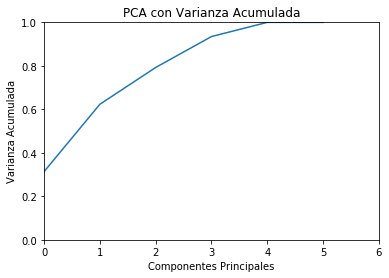

In [8]:
#Varianza acumulada
fil, col = datosEscalados.shape

ALL_PCA = PCA(col, random_state=None,
                 svd_solver='auto', tol=0.0, whiten=False).fit(datosEscalados)
ALL_Componentes = np.cumsum(ALL_PCA.explained_variance_ratio_)
print(ALL_Componentes)

pyplot.plot(np.arange(len(ALL_Componentes)), ALL_Componentes)
pyplot.xlabel('Componentes Principales')
pyplot.ylabel('Varianza Acumulada')
pyplot.title('PCA con Varianza Acumulada')
pyplot.xlim(0, len(ALL_Componentes))
pyplot.ylim(0, 1)
pyplot.show()

In [9]:
Valores_Singulares = Componentes.singular_values_ # Se calcula los valores singulares por componente principal
Valores_Singulares #Para verificar cuales componentes son las que acumulan la mayor cantidad de información

array([5.04976587e+01, 5.01722202e+01, 3.70902020e+01, 3.39963907e+01,
       2.30418395e+01, 1.34064743e-16])

In [10]:
#Se usa el 95% de varianza para explicar el modelo
Nuevas_Componentes = PCA(0.95, random_state=None,
                         svd_solver='auto', tol=0.0, whiten=False) 
Nuevos_Datos = Nuevas_Componentes.fit_transform(datosEscalados) 
print(datosEscalados.shape) # Tamaño de los datos originales
print(Nuevos_Datos.shape)

(10118, 6)
(10118, 5)


In [11]:
X_Reconstruido = Nuevas_Componentes.inverse_transform(Nuevos_Datos)#Se reconstruye el modelo a partir de las componentes principales
X_Reconstruido.shape

(10118, 6)

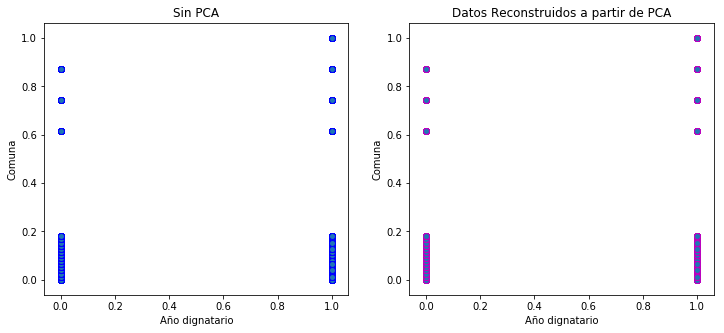

In [12]:
#Comparación gráfica con PCA y sin PCA
fig = pyplot.figure(figsize=(12,5)) # Se define el tamaño de la figura en ancho y altura 

ax = fig.add_subplot(1, 2, 1) 
ax.scatter(datosEscalados[:,0], datosEscalados[:,1], edgecolors="b")
pyplot.xlabel('Año dignatario')
pyplot.ylabel('Comuna')
pyplot.title('Sin PCA')

ax = fig.add_subplot(1, 2, 2) 
ax.scatter(X_Reconstruido[:,0], X_Reconstruido[:,1], edgecolors="m")
pyplot.xlabel('Año dignatario')
pyplot.ylabel('Comuna')
pyplot.title('Datos Reconstruidos a partir de PCA')

pyplot.show()

# K-Means

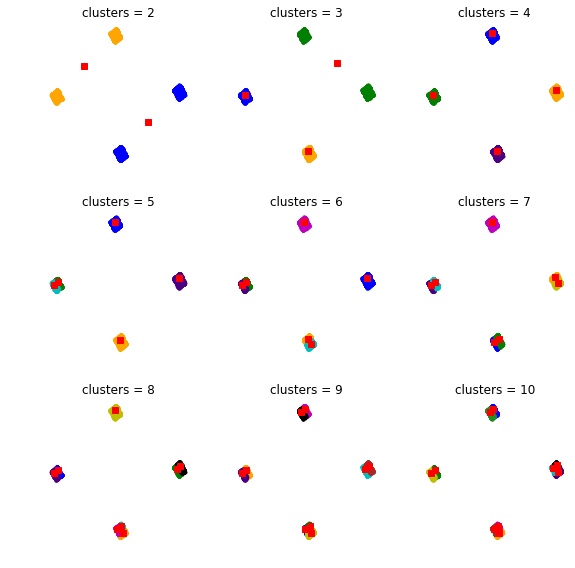

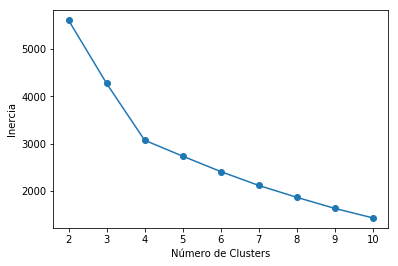

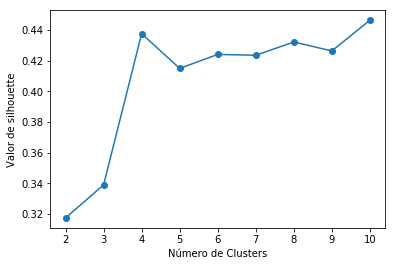

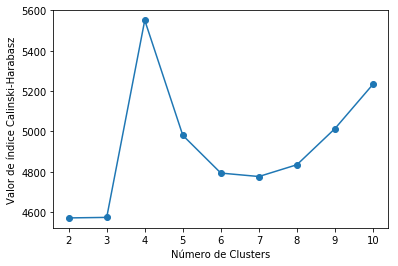

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # Método de validación silhouette
from sklearn.metrics import calinski_harabasz_score # Método de validación Calinski-Harabasz

from sklearn.utils import check_random_state # Es una librería para definir un generador de números aleatorios a partir de
                                             # de la librería numpy

mantener_valor_aleatorio = check_random_state(1000)
xpts =  Nuevos_Datos[:,0]
ypts =  Nuevos_Datos[:,1]

inercia = []
silhouette_valores = []
ch_valores = []

colors = ['b', 'orange', 'g', 'indigo', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

fig1, axes1 = pyplot.subplots(3, 3, figsize=(8, 8))

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    Modelo_Kmeans = KMeans(n_clusters = ncenters, init = 'random', n_init = 20, max_iter = 1000, tol = 1e-4,
                      precompute_distances = 'auto', random_state = mantener_valor_aleatorio, algorithm = 'auto')
    Modelo_Kmeans.fit_predict(Nuevos_Datos) # se predice las etiquetas que se asocian a los datos
    Etiquetas = Modelo_Kmeans.labels_ # Calcula las clases o etiquetas
    centros = Modelo_Kmeans.cluster_centers_ # Calcula la matriz de centros
    inercia.append(Modelo_Kmeans.inertia_) # optimiza el punto de inercia de acuerdo al número de clusters
    silhouette_valores.append(silhouette_score(Nuevos_Datos, Etiquetas)) # Se aplica la métrica Silhouette
    ch_valores.append(calinski_harabasz_score(Nuevos_Datos, Etiquetas)) # Se aplica la métrica Calinski-Harabasz
    
    for j in range(ncenters):
        ax.plot(xpts[Etiquetas == j],
                ypts[Etiquetas == j], '.', color=colors[j])

    for pt in centros:
        ax.plot(pt[0], pt[1], 'rs')
    
    ax.set_title('clusters = {0}'.format(ncenters))
    ax.axis('off') 

fig1.tight_layout()
pyplot.show()

fig2, ax2 = pyplot.subplots()
ax2.plot(np.r_[2:11], inercia, marker = 'o')
ax2.set_xlabel("Número de Clusters")
ax2.set_ylabel("Inercia")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], silhouette_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de silhouette")
pyplot.show()

fig3, ax3 = pyplot.subplots()
ax3.plot(np.r_[2:11], ch_valores, marker = 'o')
ax3.set_xlabel("Número de Clusters")
ax3.set_ylabel("Valor de índice Calinski-Harabasz")
pyplot.show()

## DBSCAN

C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\Daniel\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Se realiza la prueba con eps: 0.1
y con minimas muestras: 10
Número estimado de datos con ruido: 649
El total de datos de la clase  0  son:  1918
El total de datos de la clase  1  son:  788
El total de datos de la clase  2  son:  1309
El total de datos de la clase  3  son:  10
El total de datos de la clase  4  son:  7
El total de datos de la clase  5  son:  16
El total de datos de la clase  6  son:  17
El total de datos de la clase  7  son:  23
El total de datos de la clase  8  son:  63
El total de datos de la clase  9  son:  89
El total de datos de la clase  10  son:  13
El total de datos de la clase  11  son:  55
El total de datos de la clase  12  son:  13
El total de datos de la clase  13  son:  21
El total de datos de la clase  14  son:  15
El total de datos de la clase  15  son:  18
El total de datos de la clase  16  son:  19
El total de datos de la clase  17  son:  30
El total de datos de la clase  18  son:  19
El total de datos de la clase  19  son:  20
El total de datos de la c

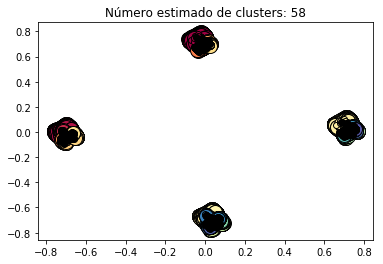

Se realiza la prueba con eps: 0.1
y con minimas muestras: 30
Número estimado de datos con ruido: 2347
El total de datos de la clase  0  son:  788
El total de datos de la clase  1  son:  221
El total de datos de la clase  2  son:  940
El total de datos de la clase  3  son:  967
El total de datos de la clase  4  son:  300
El total de datos de la clase  5  son:  199
El total de datos de la clase  6  son:  63
El total de datos de la clase  7  son:  51
El total de datos de la clase  8  son:  30
El total de datos de la clase  9  son:  104
El total de datos de la clase  10  son:  68
El total de datos de la clase  11  son:  30
El total de datos de la clase  12  son:  1046
El total de datos de la clase  13  son:  993
El total de datos de la clase  14  son:  71
El total de datos de la clase  15  son:  34
El total de datos de la clase  16  son:  69
El total de datos de la clase  17  son:  39
El total de datos de la clase  18  son:  783
El total de datos de la clase  19  son:  321
El total de dato

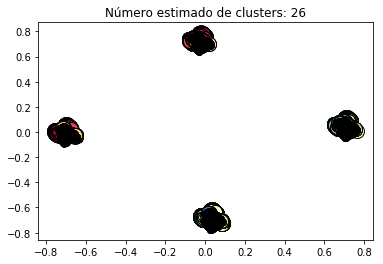

Se realiza la prueba con eps: 0.1
y con minimas muestras: 50
Número estimado de datos con ruido: 4211
El total de datos de la clase  0  son:  953
El total de datos de la clase  1  son:  967
El total de datos de la clase  2  son:  757
El total de datos de la clase  3  son:  155
El total de datos de la clase  4  son:  57
El total de datos de la clase  5  son:  67
El total de datos de la clase  6  son:  164
El total de datos de la clase  7  son:  748
El total de datos de la clase  8  son:  1046
El total de datos de la clase  9  son:  993


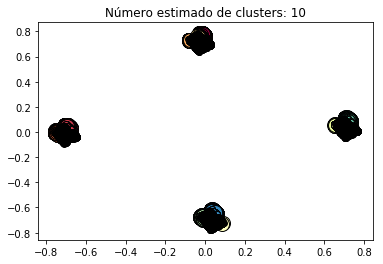

Se realiza la prueba con eps: 0.1
y con minimas muestras: 80
Número estimado de datos con ruido: 5647
El total de datos de la clase  0  son:  929
El total de datos de la clase  1  son:  963
El total de datos de la clase  2  son:  317
El total de datos de la clase  3  son:  1027
El total de datos de la clase  4  son:  988
El total de datos de la clase  5  son:  247


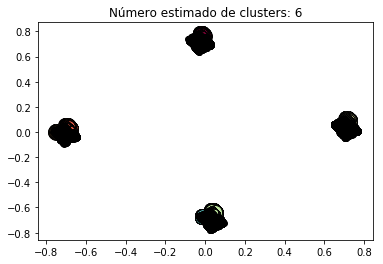

Se realiza la prueba con eps: 0.1
y con minimas muestras: 100
Número estimado de datos con ruido: 6305
El total de datos de la clase  0  son:  719
El total de datos de la clase  1  son:  701
El total de datos de la clase  2  son:  131
El total de datos de la clase  3  son:  156
El total de datos de la clase  4  son:  174
El total de datos de la clase  5  son:  969
El total de datos de la clase  6  son:  963


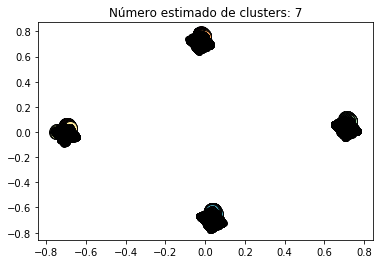

Se realiza la prueba con eps: 0.3
y con minimas muestras: 10
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  1924
El total de datos de la clase  1  son:  2128
El total de datos de la clase  2  son:  336
El total de datos de la clase  3  son:  420
El total de datos de la clase  4  son:  2147
El total de datos de la clase  5  son:  2058
El total de datos de la clase  6  son:  479


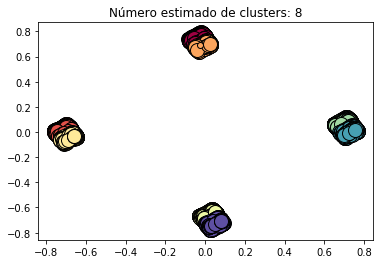

Se realiza la prueba con eps: 0.3
y con minimas muestras: 30
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  1924
El total de datos de la clase  1  son:  2128
El total de datos de la clase  2  son:  336
El total de datos de la clase  3  son:  420
El total de datos de la clase  4  son:  2147
El total de datos de la clase  5  son:  2058
El total de datos de la clase  6  son:  479


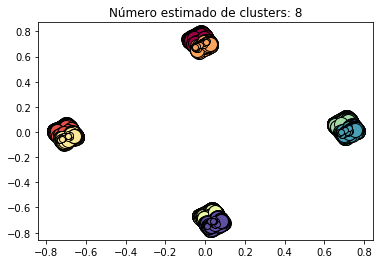

Se realiza la prueba con eps: 0.3
y con minimas muestras: 50
Número estimado de datos con ruido: 67
El total de datos de la clase  0  son:  1924
El total de datos de la clase  1  son:  2128
El total de datos de la clase  2  son:  316
El total de datos de la clase  3  son:  401
El total de datos de la clase  4  son:  2147
El total de datos de la clase  5  son:  2058
El total de datos de la clase  6  son:  452
El total de datos de la clase  7  son:  625


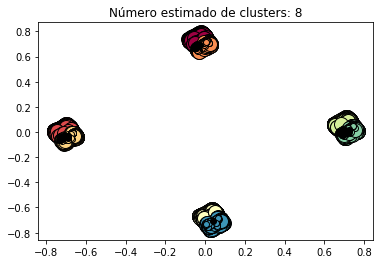

Se realiza la prueba con eps: 0.3
y con minimas muestras: 80
Número estimado de datos con ruido: 194
El total de datos de la clase  0  son:  1924
El total de datos de la clase  1  son:  2128
El total de datos de la clase  2  son:  155
El total de datos de la clase  3  son:  285
El total de datos de la clase  4  son:  221
El total de datos de la clase  5  son:  2147
El total de datos de la clase  6  son:  2058
El total de datos de la clase  7  son:  244
El total de datos de la clase  8  son:  407
El total de datos de la clase  9  son:  355


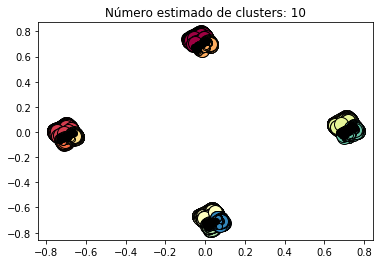

Se realiza la prueba con eps: 0.3
y con minimas muestras: 100
Número estimado de datos con ruido: 375
El total de datos de la clase  0  son:  1924
El total de datos de la clase  1  son:  2128
El total de datos de la clase  2  son:  191
El total de datos de la clase  3  son:  211
El total de datos de la clase  4  son:  145
El total de datos de la clase  5  son:  2147
El total de datos de la clase  6  son:  2058
El total de datos de la clase  7  son:  214
El total de datos de la clase  8  son:  393
El total de datos de la clase  9  son:  332


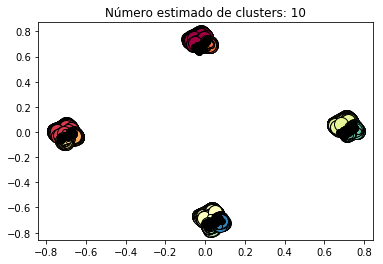

Se realiza la prueba con eps: 0.5
y con minimas muestras: 10
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  2260
El total de datos de la clase  1  son:  2548
El total de datos de la clase  2  son:  2773


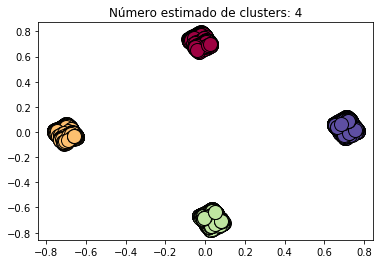

Se realiza la prueba con eps: 0.5
y con minimas muestras: 30
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  2260
El total de datos de la clase  1  son:  2548
El total de datos de la clase  2  son:  2773


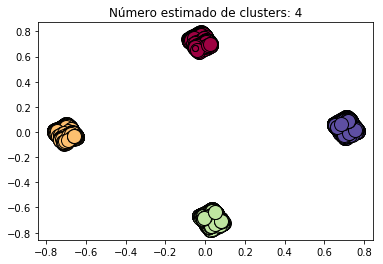

Se realiza la prueba con eps: 0.5
y con minimas muestras: 50
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  2260
El total de datos de la clase  1  son:  2548
El total de datos de la clase  2  son:  2773


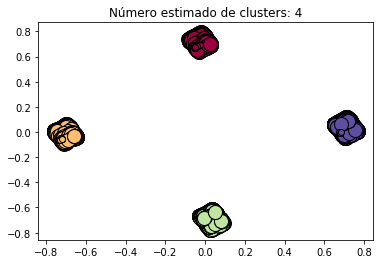

Se realiza la prueba con eps: 0.5
y con minimas muestras: 80
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  2260
El total de datos de la clase  1  son:  2548
El total de datos de la clase  2  son:  2773


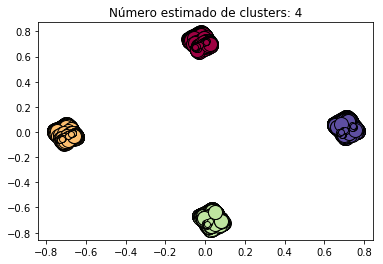

Se realiza la prueba con eps: 0.5
y con minimas muestras: 100
Número estimado de datos con ruido: 4
El total de datos de la clase  0  son:  2256
El total de datos de la clase  1  son:  2548
El total de datos de la clase  2  son:  2773
El total de datos de la clase  3  son:  2537


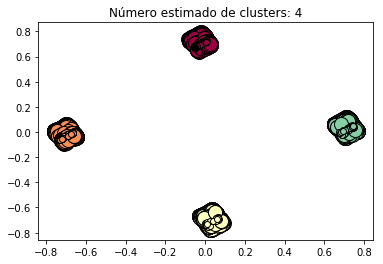

Se realiza la prueba con eps: 0.7
y con minimas muestras: 10
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  2260
El total de datos de la clase  1  son:  2548
El total de datos de la clase  2  son:  2773


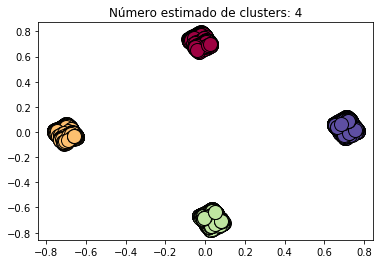

Se realiza la prueba con eps: 0.7
y con minimas muestras: 30
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  2260
El total de datos de la clase  1  son:  2548
El total de datos de la clase  2  son:  2773


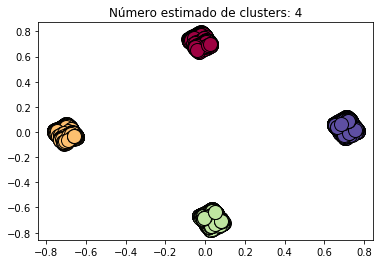

Se realiza la prueba con eps: 0.7
y con minimas muestras: 50
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  2260
El total de datos de la clase  1  son:  2548
El total de datos de la clase  2  son:  2773


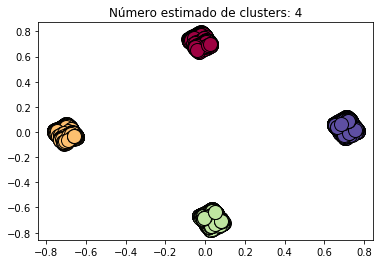

Se realiza la prueba con eps: 0.7
y con minimas muestras: 80
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  2260
El total de datos de la clase  1  son:  2548
El total de datos de la clase  2  son:  2773


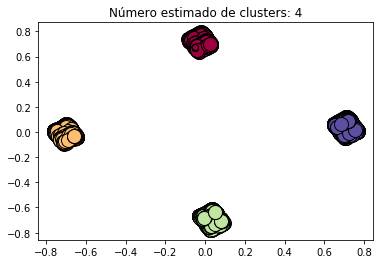

Se realiza la prueba con eps: 0.7
y con minimas muestras: 100
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  2260
El total de datos de la clase  1  son:  2548
El total de datos de la clase  2  son:  2773


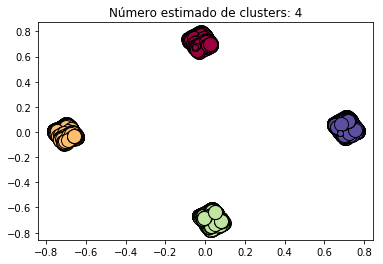

Se realiza la prueba con eps: 0.9
y con minimas muestras: 10
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  2260
El total de datos de la clase  1  son:  2548
El total de datos de la clase  2  son:  2773


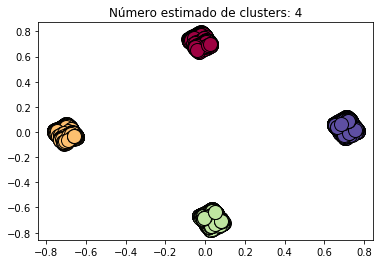

Se realiza la prueba con eps: 0.9
y con minimas muestras: 30
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  2260
El total de datos de la clase  1  son:  2548
El total de datos de la clase  2  son:  2773


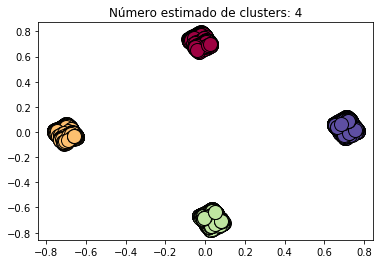

Se realiza la prueba con eps: 0.9
y con minimas muestras: 50
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  2260
El total de datos de la clase  1  son:  2548
El total de datos de la clase  2  son:  2773


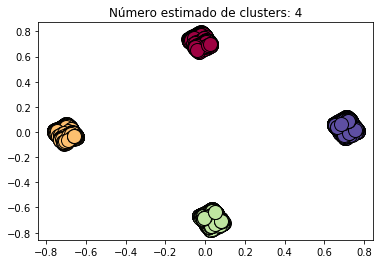

Se realiza la prueba con eps: 0.9
y con minimas muestras: 80
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  2260
El total de datos de la clase  1  son:  2548
El total de datos de la clase  2  son:  2773


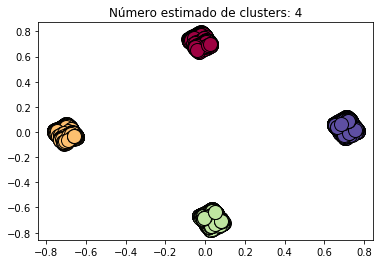

Se realiza la prueba con eps: 0.9
y con minimas muestras: 100
Número estimado de datos con ruido: 0
El total de datos de la clase  0  son:  2260
El total de datos de la clase  1  son:  2548
El total de datos de la clase  2  son:  2773


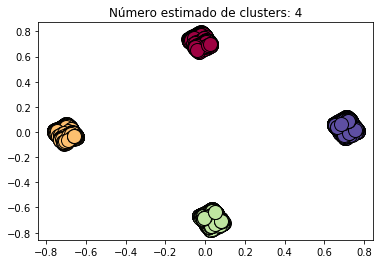

In [14]:
from sklearn.cluster import DBSCAN # Se aplica el algoritmo de clustering DBSCAN
from sklearn.datasets import make_moons # base de datos de las lunas 
import mglearn


epss = [0.1,0.3,0.5,0.7,0.9]
mins = [10,30,50,80,100]

for eps in epss:
    for mi in mins:
        print ("Se realiza la prueba con eps:", eps)
        print ("y con minimas muestras:", mi)
        Modelo_DBSCAN_Basico = DBSCAN(eps = eps, metric = 'euclidean', algorithm = 'auto', leaf_size = 10, min_samples = mi) 
        Modelo_DBSCAN_Basico.fit_predict(Nuevos_Datos)
        Etiquetas = Modelo_DBSCAN_Basico.labels_ # Calcula las clases o etiquetas con ruido
        centros = Modelo_DBSCAN_Basico.components_ # Calcula la matriz de centros nucleares
        core_samples_mask = np.zeros_like(Etiquetas, dtype=bool)
        core_samples_mask[Modelo_DBSCAN_Basico.core_sample_indices_] = True     
        n_clusters_ = len(set(Etiquetas)) - (1 if -1 in Etiquetas else 0)
        n_ruido_ = list(Etiquetas).count(-1)
        Clases_Sin_Ruido = Modelo_DBSCAN_Basico.labels_ # Calcula las clases o etiquetas sin ruido

        unique_labels = set(Clases_Sin_Ruido)
        colors = [pyplot.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]

        print('Número estimado de datos con ruido: %d' % n_ruido_)

        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Los puntos negros significan datos con ruido y que no pudieron ser agrupados
                col = [0, 0, 0, 1]

            class_member_mask = (Clases_Sin_Ruido == k)

            xy = Nuevos_Datos[class_member_mask & core_samples_mask]
            pyplot.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

            xy = Nuevos_Datos[class_member_mask & ~core_samples_mask]
            pyplot.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

        #print("Para ", ncenters, " Clusters: ")   
        for i in range (len(np.unique(Etiquetas)) -1):
            print("El total de datos de la clase ", i, " son: ", len(Etiquetas[Etiquetas==i]))

        pyplot.title('Número estimado de clusters: %d' % n_clusters_)
        pyplot.show()

# GK-Means

TypeError: 'NoneType' object does not support item assignment

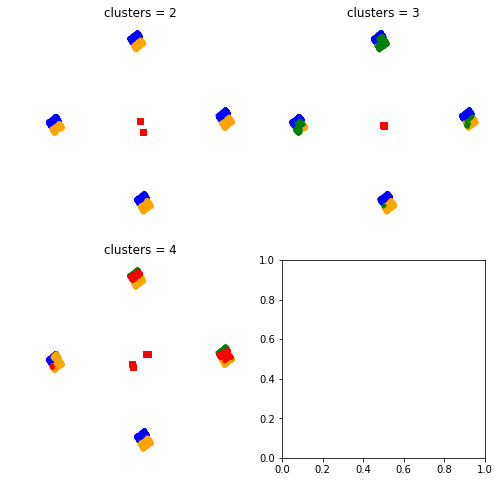

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import check_random_state # Es una librería para definir un generador de números aleatorios a partir de
                                             # de la librería numpy
from skcmeans.algorithms import Probabilistic, GustafsonKesselMixin # Algoritmo GK probabilístico

from cvi import * # Indices de validación interna

# cvi es una librería desarrollada por 99991
# ir a la url: https://github.com/99991/FuzzyClustering/blob/master/cvi.py
# pip install git+git://github.com/bm424/scikit-cmeans.git@master


class GKProbabilistic(Probabilistic, GustafsonKesselMixin):
    pass
xpts =  Nuevos_Datos[:,0]
ypts =  Nuevos_Datos[:,1]

fig1, axes1 = plt.subplots(2, 2, figsize=(8, 8))
resultados = []
cs = np.arange(2, 6) # Rango de número mínimo y máximo de clusters
mantener_valor_aleatorio = check_random_state(1000)

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    modelo_GK = GKProbabilistic(n_clusters = ncenters, n_init = 20, max_iter = 300, 
                                tol=1e-3, verbosity = 0, random_state = mantener_valor_aleatorio, eps = 1e-18)
    Ajuste = modelo_GK.fit(Nuevos_Datos)
    U = Ajuste.calculate_memberships(Nuevos_Datos)
    centros = Ajuste.calculate_centers(Nuevos_Datos)
    cluster_membership = np.argmax(U.T, axis=0)
    
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])
    
    for pt in centros:
        ax.plot(pt[0], pt[1], 'rs')
        
    ax.set_title('clusters = {0}'.format(ncenters))
    ax.axis('off')
    
    resultados.append([])
    for method in methods:
        resultado = method(Nuevos_Datos, U.T, centros, m = 2)
        resultados[-1].append(resultado)

plt.tight_layout()
plt.show()

resultados = np.array(resultados)

ny = 4
nx = 2

for i, method in enumerate(methods):
    plt.subplot(ny, nx, 1 + i)
    column = resultados[:, i]
    plt.plot(cs, column)
    if targets[i] == "min":
        ncenters = cs[np.argmin(column)]
    else:
        ncenters = cs[np.argmax(column)]
    plt.title("%s, %s es de %d"%(method.__name__, targets[i], ncenters))   
    plt.plot([ncenters, ncenters],[np.min(column), np.max(column)])

plt.tight_layout()
plt.show()

In [ ]:
ncenters = 2

modelo_GK = GKProbabilistic(n_clusters = ncenters, n_init = 20, max_iter = 300, 
                                tol=1e-3, verbosity = 0, random_state = mantener_valor_aleatorio, eps = 1e-18)
Ajuste = modelo_GK.fit(Nuevos_Datos)

U = Ajuste.calculate_memberships(Nuevos_Datos)

Target = np.argmax(U.T, axis=0)

print(len(Target))

Datos_para_clasificar = Nuevos_Datos

Clases = Target

print("Para ", ncenters, " Clusters: ")   
for i in range (len(np.unique(Clases))):       
    print("El total de datos de la clase ", i, " son: ", len(Clases[Clases==i]))
